## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#Importing libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
#Import data and display head and attributes
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
print(df['waterfront'].value_counts())
print(df['view'].value_counts())
print(df['yr_renovated'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [7]:
#waterfront and view columns look to be categorical so we can replace Nan values with 0
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)

In [8]:
#change yr_renovated to categorical variable
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'] = np.where(df['yr_renovated'].between(2006,2015), 3, df['yr_renovated']).astype(int)
df['yr_renovated'] = np.where(df['yr_renovated'].between(1996,2005), 2, df['yr_renovated']).astype(int)
df['yr_renovated'] = np.where(df['yr_renovated'].between(1986,1995), 1, df['yr_renovated']).astype(int)
df['yr_renovated'] = np.where(df['yr_renovated'].between(1934,1985), 0, df['yr_renovated']).astype(int)

In [9]:
#rename column
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
df['renovated'].value_counts()

0    21016
3      236
2      197
1      148
Name: renovated, dtype: int64

In [10]:
#dropping id column
df = df.drop(['id'], axis=1)

In [11]:
#splitting date into month and year columns, removing day
full_date = df['date'].str.split('/', expand=True)

In [12]:
df['sale_month'] = full_date[0].astype(int)
df['sale_year'] = full_date[2].astype(int)
df = df.drop(['date'], axis=1)

In [13]:
#replacing '?' with 0 in sqft_basement
df['sqft_basement'] = df['sqft_basement'].replace('?', 0).astype(float)

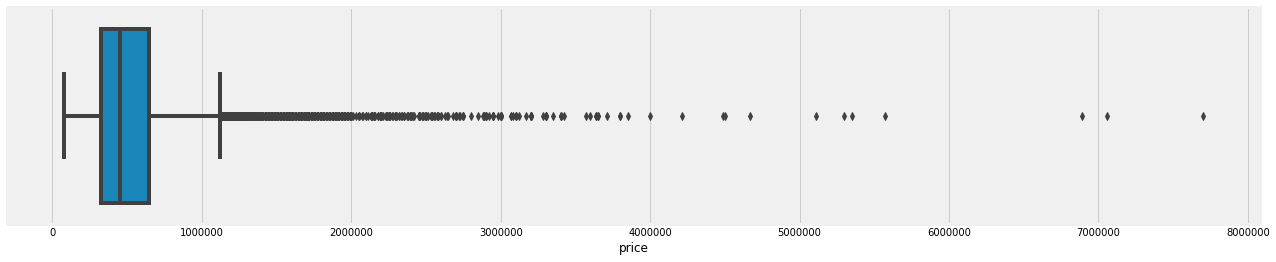

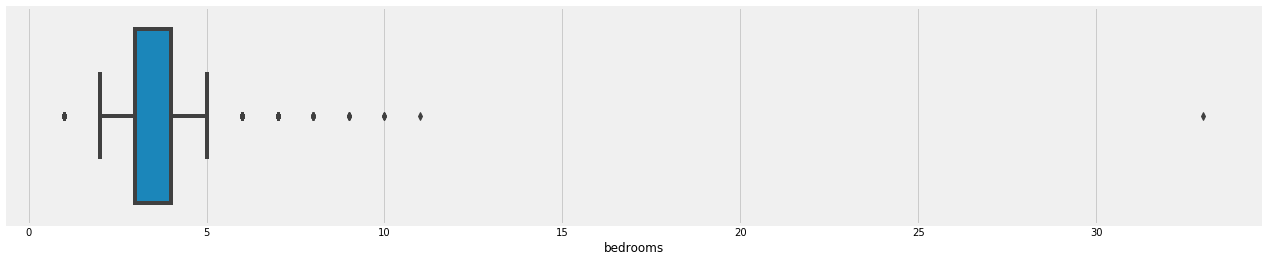

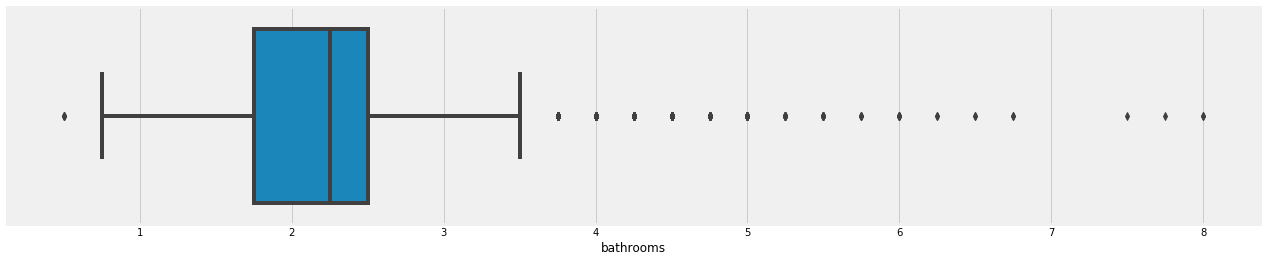

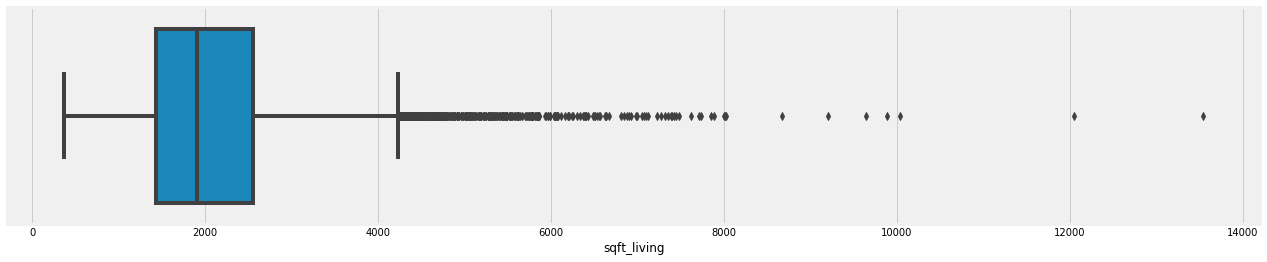

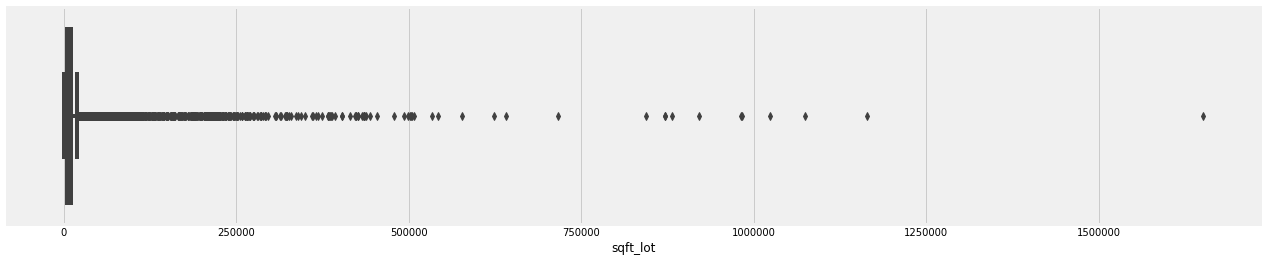

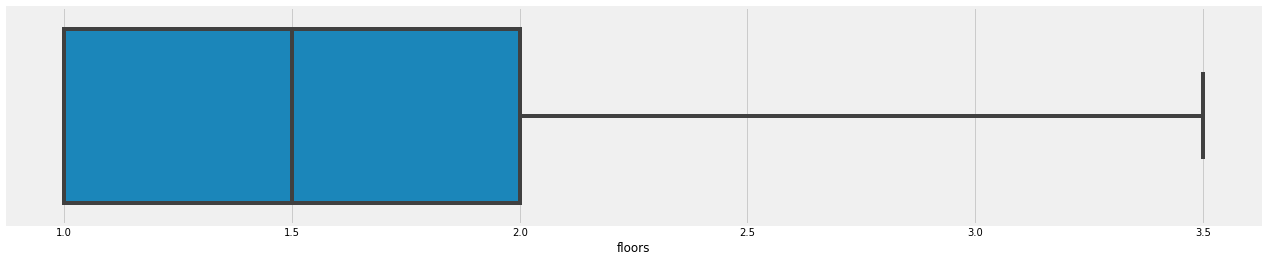

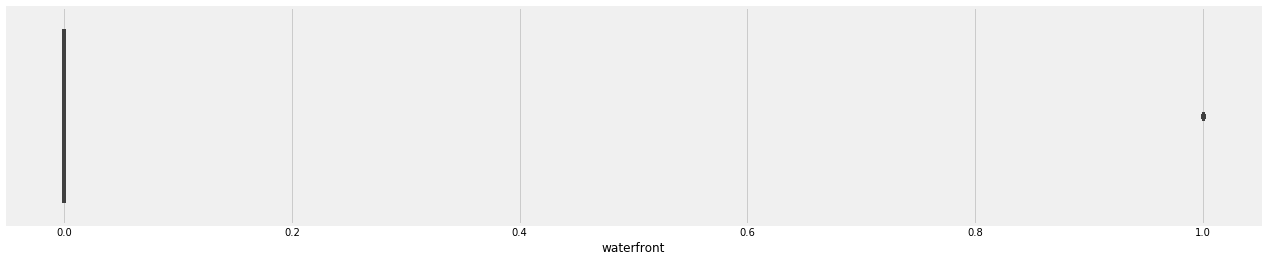

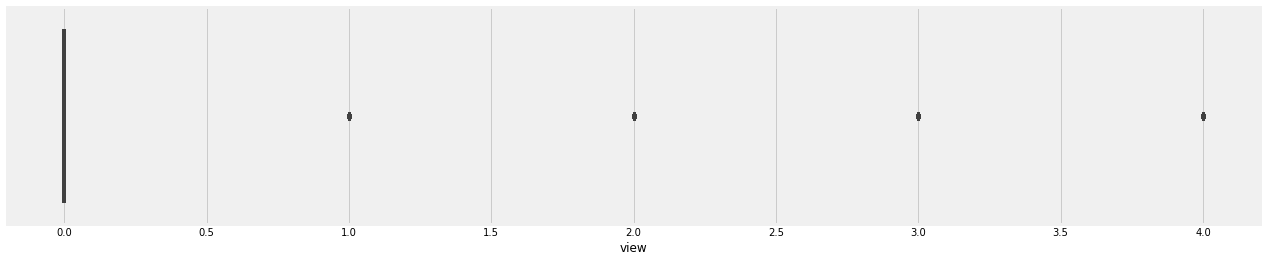

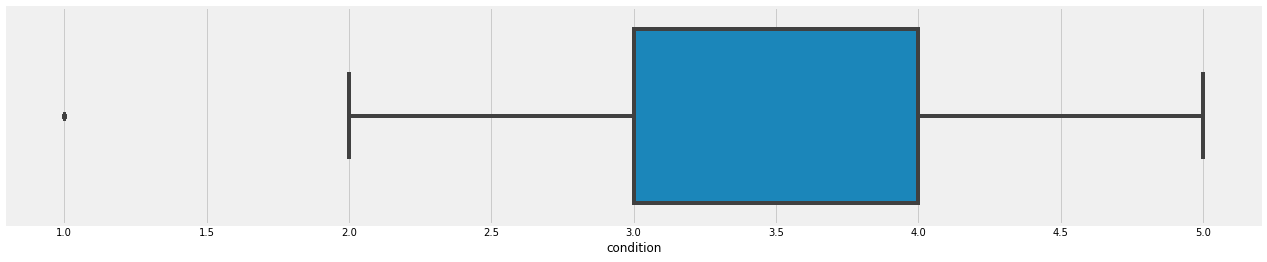

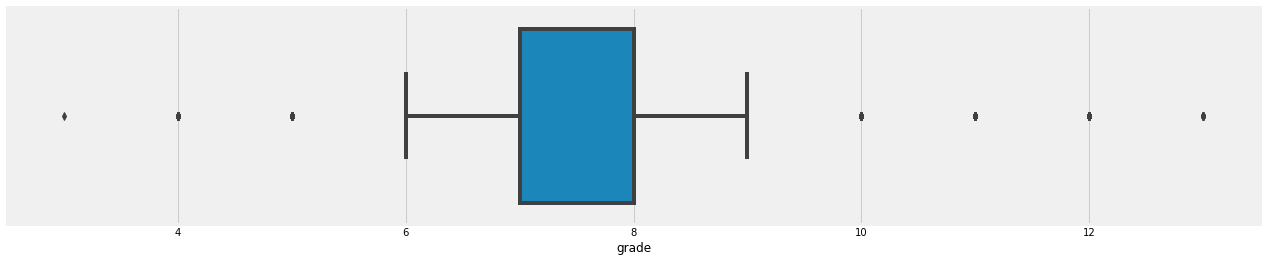

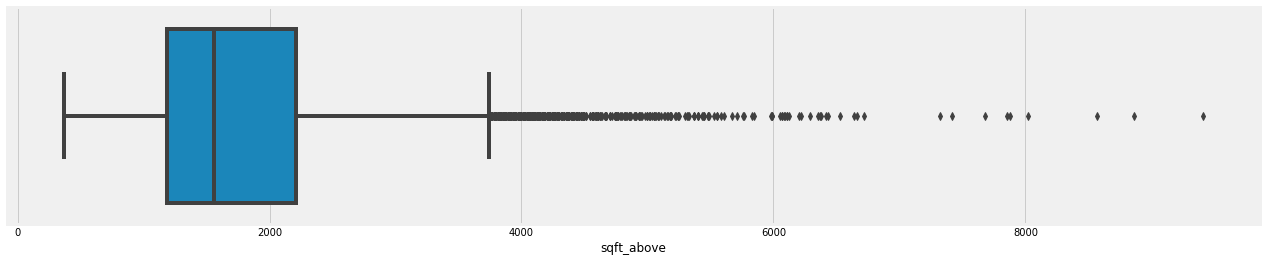

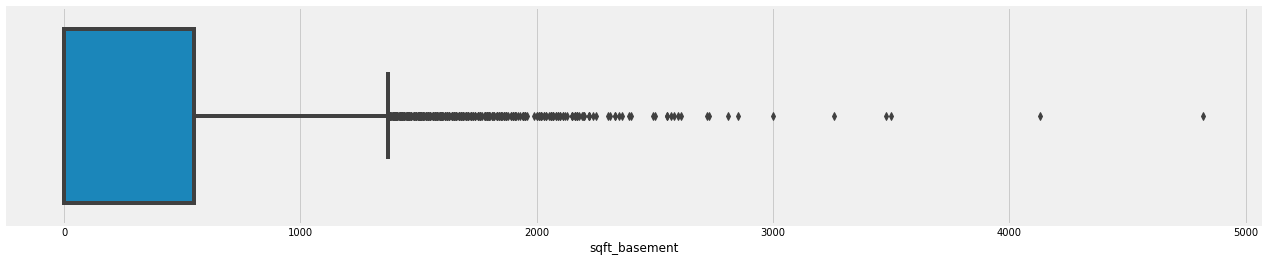

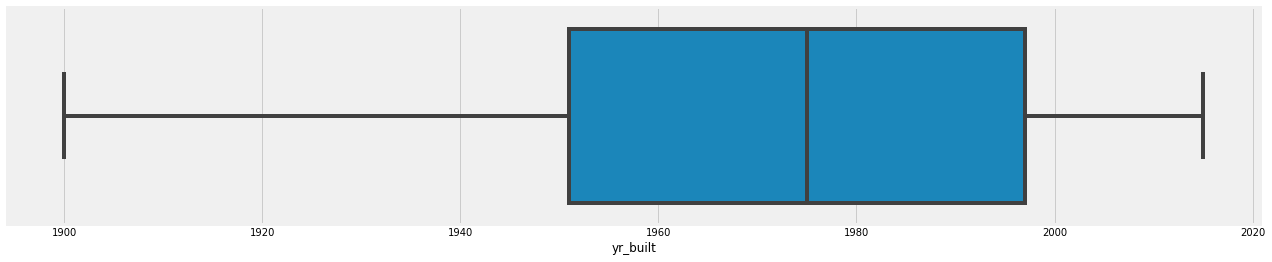

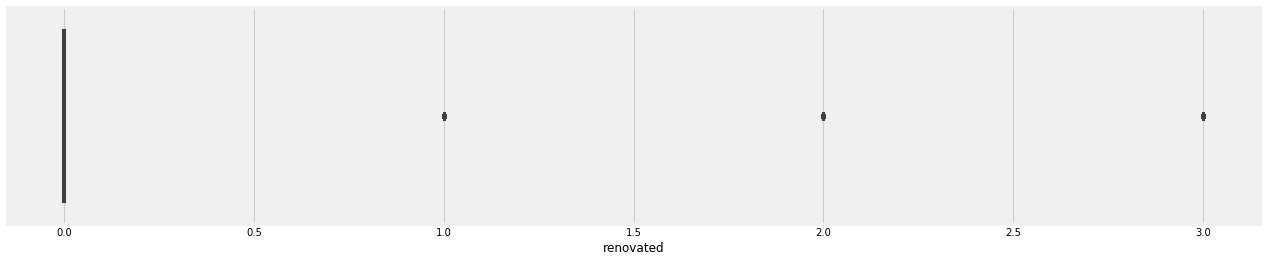

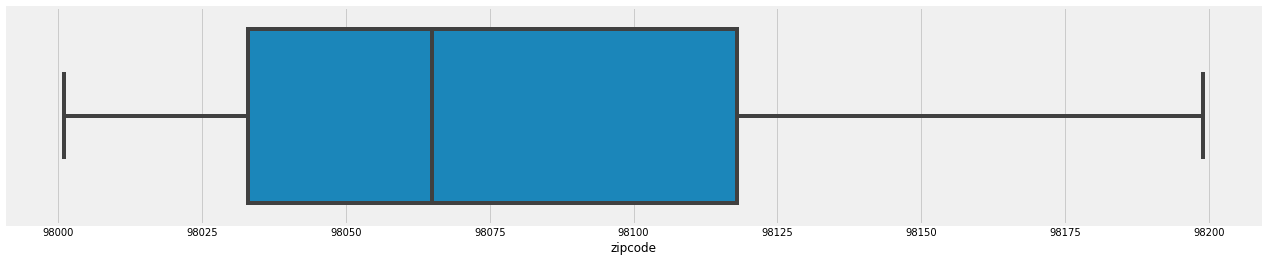

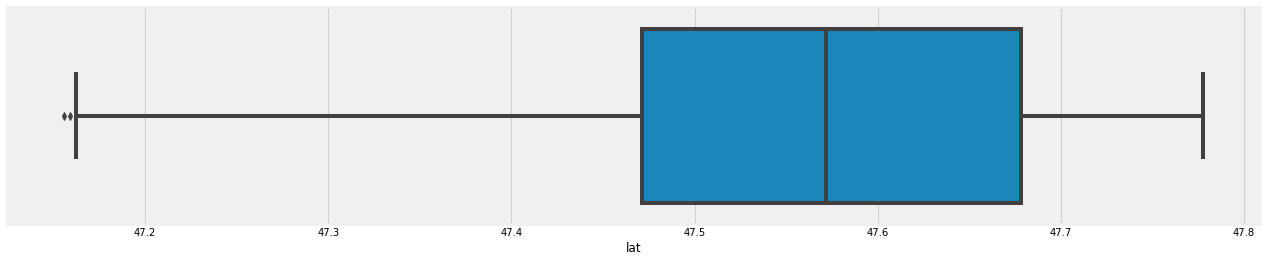

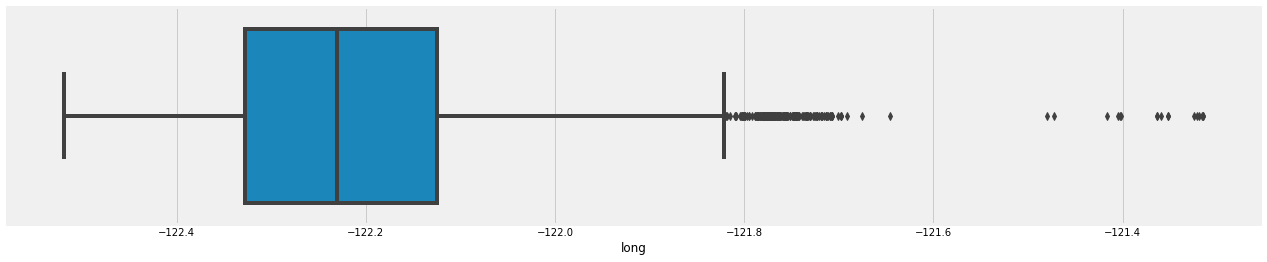

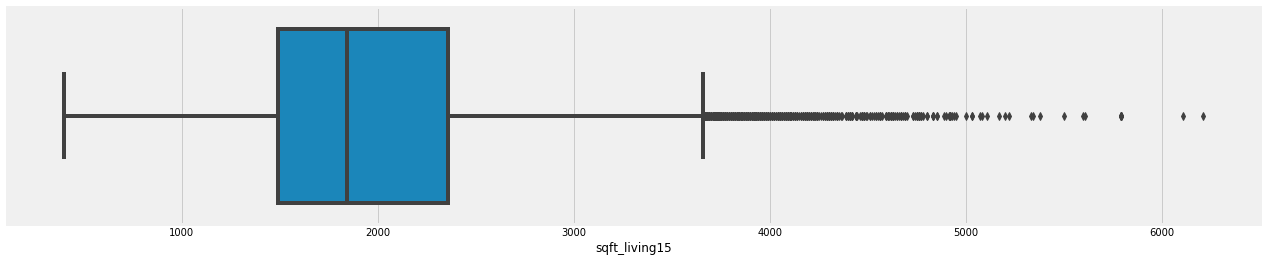

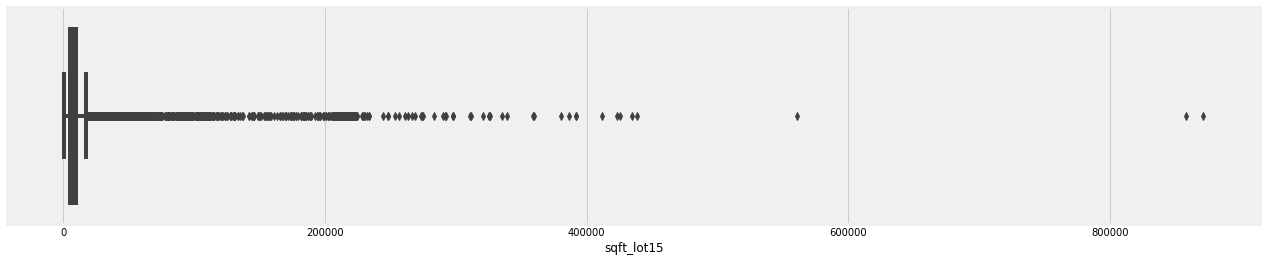

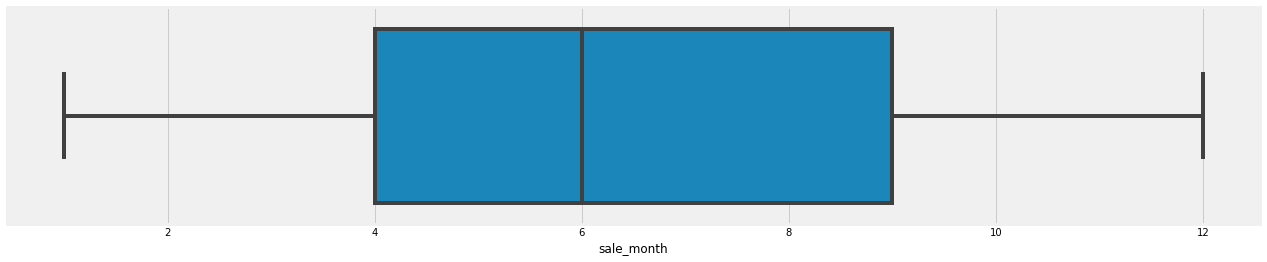

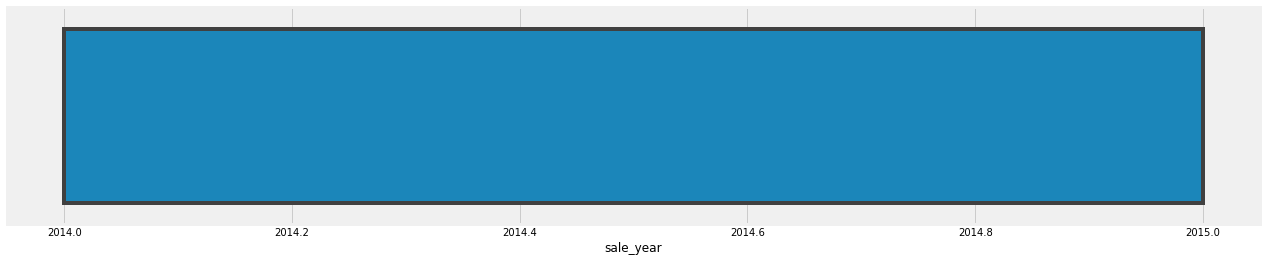

In [14]:
#Identifying and removing outliers using boxplots
for column in df.columns:
    plt.figure(figsize=(20,4))
    plt.rcParams.update({'figure.max_open_warning': 0})
    sns.boxplot(x=df[column])

In [15]:
df = df[df['bedrooms'] < 7]
df = df[df['bathrooms'] < 5]
df = df[df['sqft_living'] < 7000]
df = df[df['sqft_lot'] < 400000]
df = df[df['sqft_above'] < 5000]
df = df[df['sqft_basement'] < 2000]
df = df[df['sqft_living'] < 4500]
df = df[df['sqft_lot15'] < 200000]

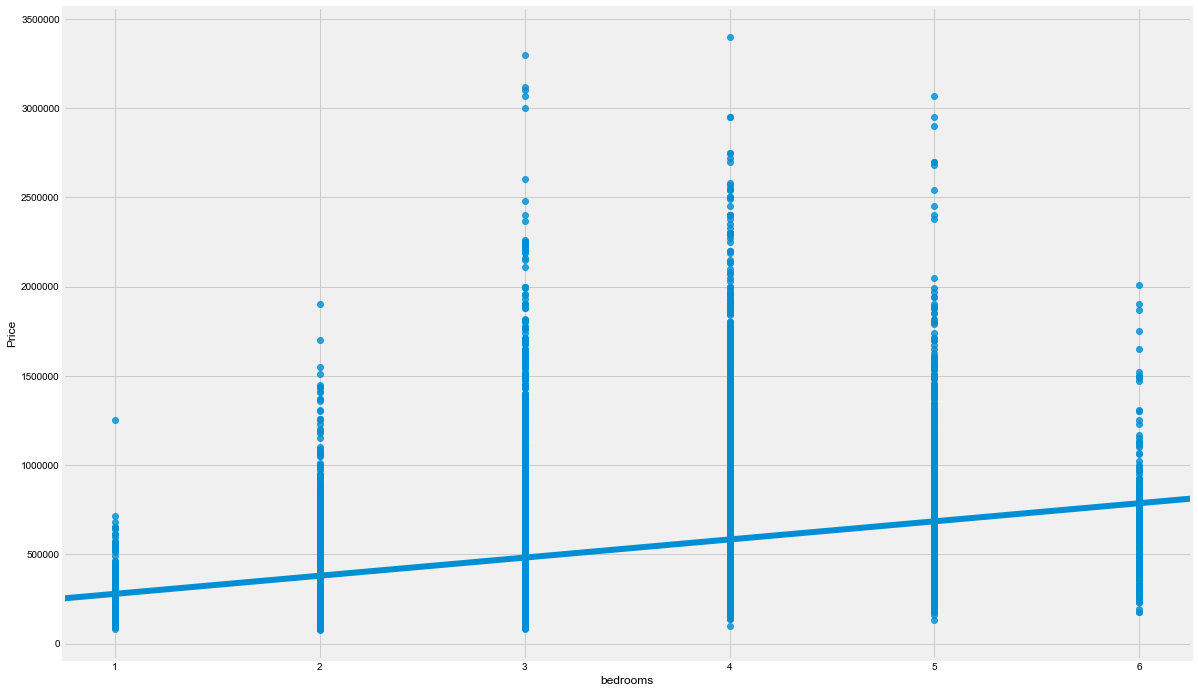

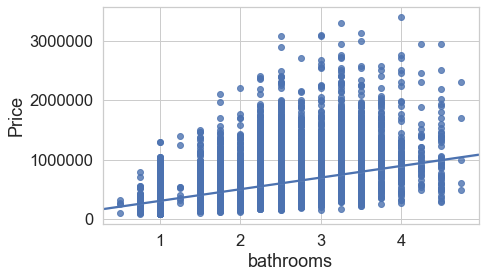

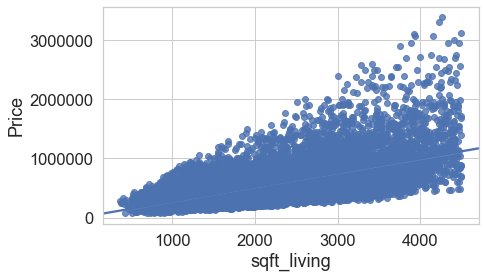

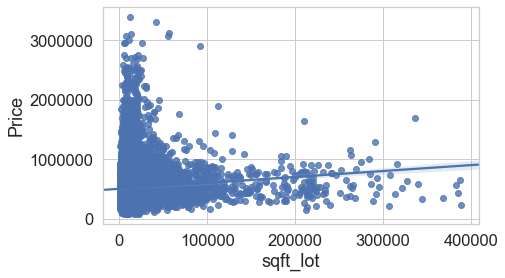

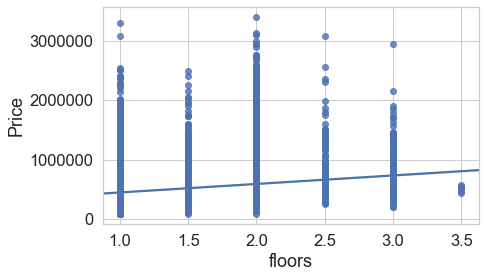

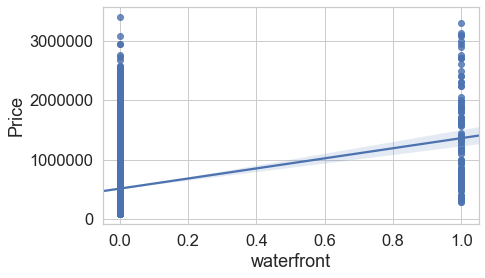

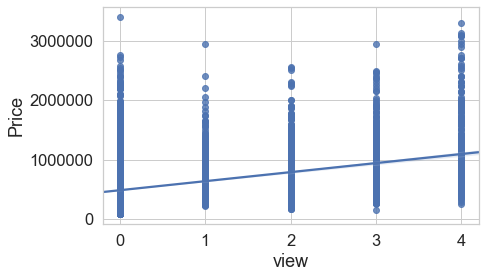

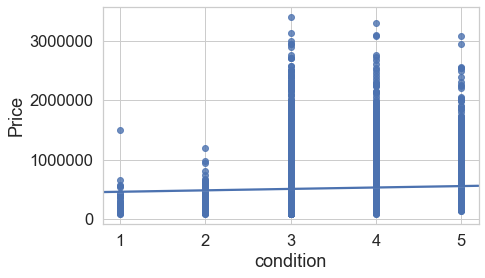

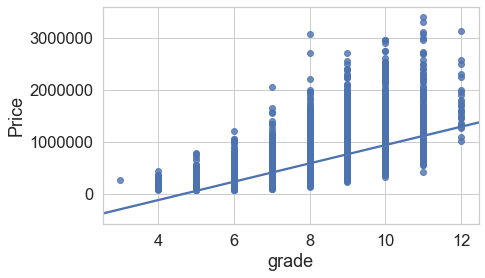

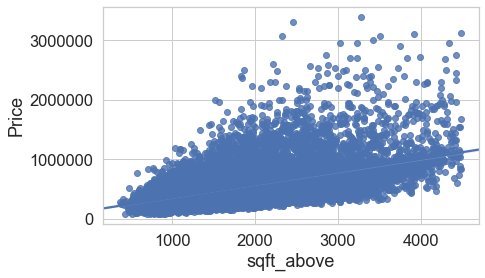

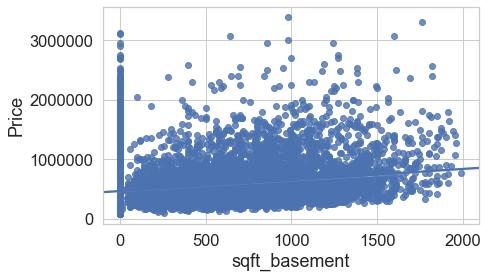

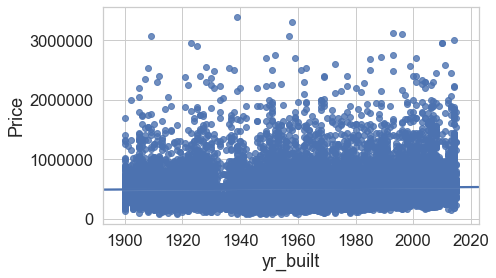

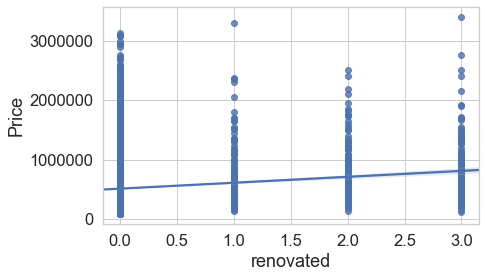

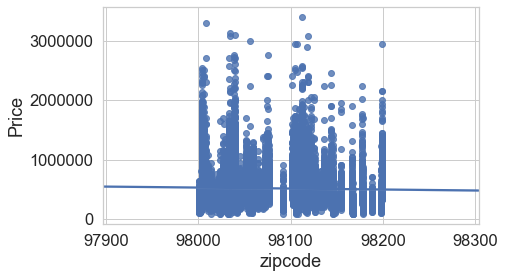

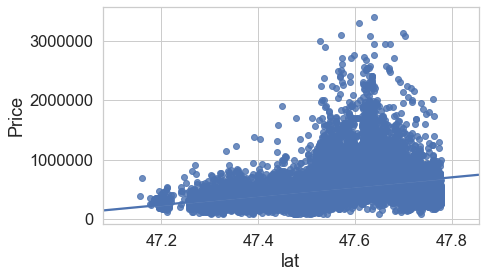

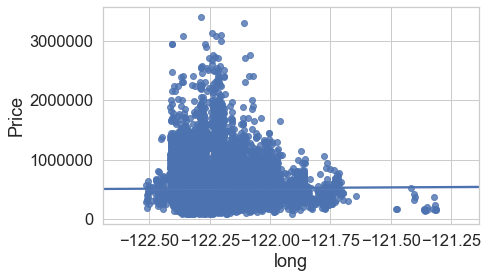

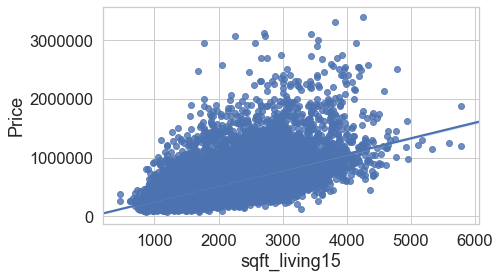

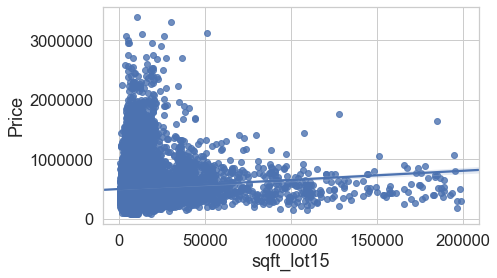

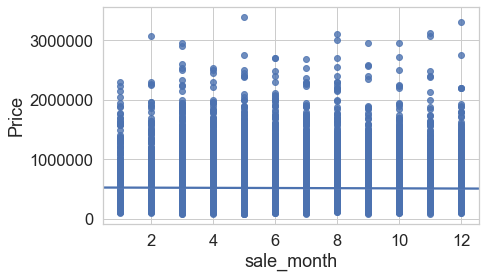

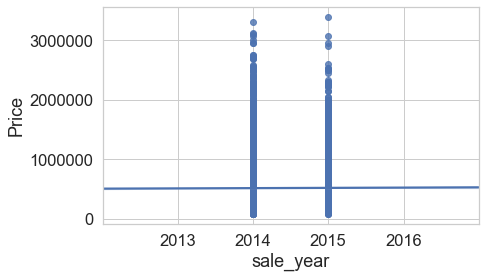

In [16]:
#Using regplots to look at relationships between price and features
fig, ax = plt.subplots(figsize=(18,12))
df_drop_price = df.drop(columns=['price'], axis=1)
for column in df_drop_price.columns:
    ax = sns.regplot(column, df.price, data=df)
    ax.set(xlabel=column, ylabel='Price')
    sns.set(style='whitegrid', font_scale=1.5)
    plt.show()

# Multicollinearity

Text(0.5, 1, 'Feature Correlation')

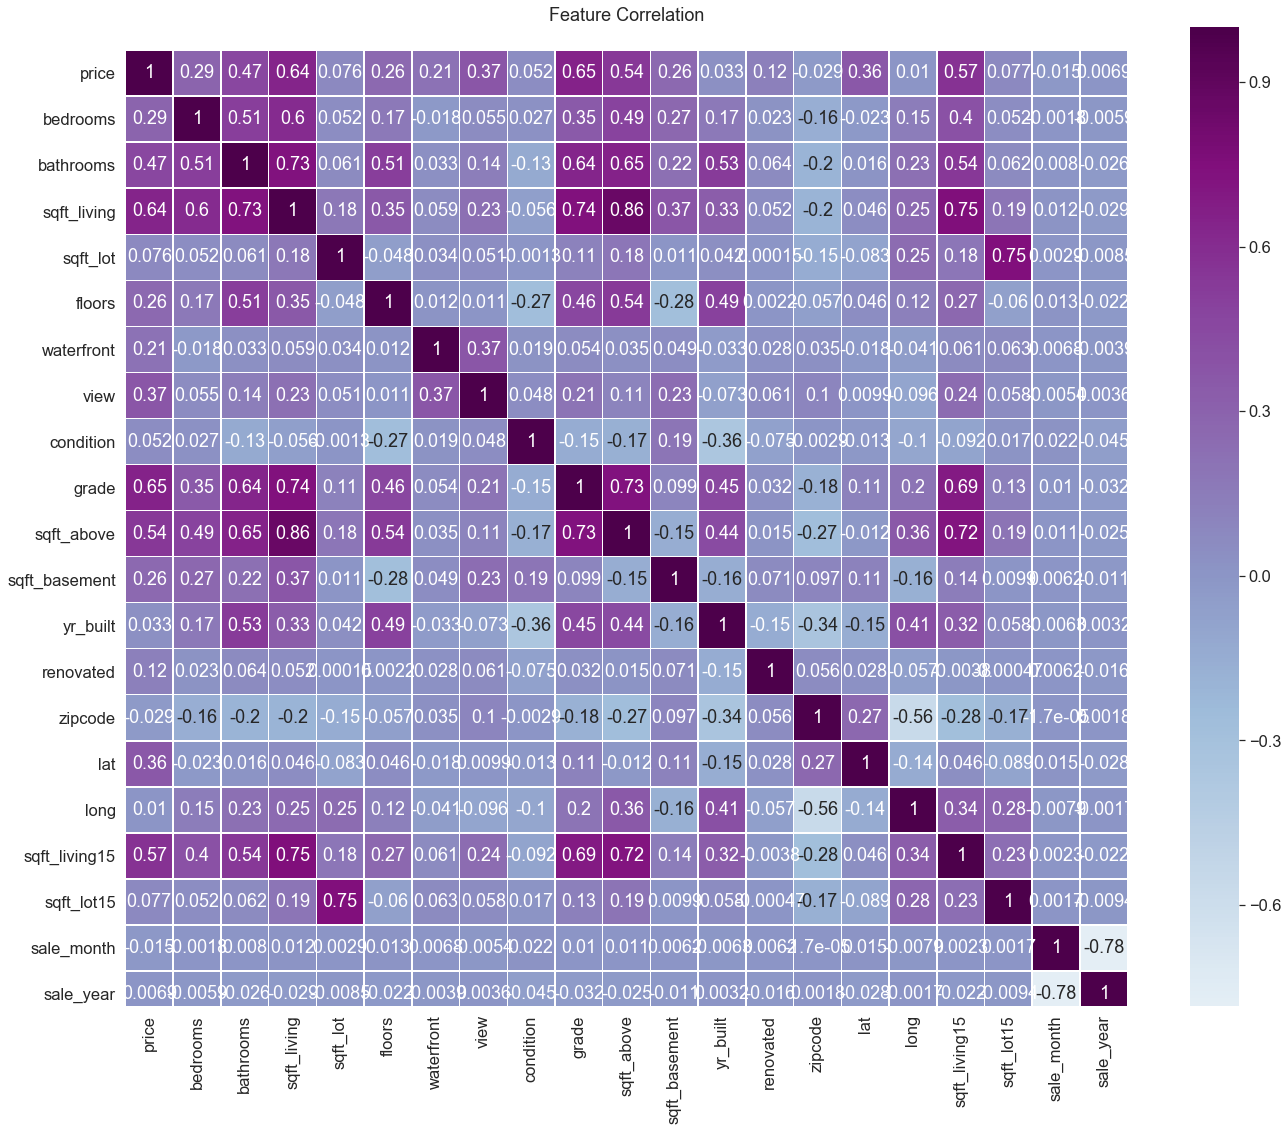

In [17]:
#Overview using heatmap
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="BuPu")
ax.set_ylim(len(df.corr())-0.25, -0.5)
plt.title('Feature Correlation')

In [18]:
df_multi = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multi['pairs'] = list(zip(df_multi['level_0'], df_multi['level_1']))
df_multi.set_index(['pairs'], inplace=True)
df_multi.head(50)

,level_0,level_1,0
pairs,,,
"(price, price)",price,price,1.000000
"(sqft_basement, sqft_basement)",sqft_basement,sqft_basement,1.000000
"(sqft_living, sqft_living)",sqft_living,sqft_living,1.000000
"(sqft_lot, sqft_lot)",sqft_lot,sqft_lot,1.000000
"(floors, floors)",floors,floors,1.000000
"(waterfront, waterfront)",waterfront,waterfront,1.000000
"(view, view)",view,view,1.000000
"(condition, condition)",condition,condition,1.000000
"(grade, grade)",grade,grade,1.000000


In [19]:
#Dropping highly correlated columns
columns_to_drop = ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sale_year', 'grade']
df.drop(columns_to_drop, axis=1, inplace=True)

In [20]:
#Categorizing the zipcode feature to use in place of zipcode, lat, and log.  First resetting index:
df = df.reset_index()

In [21]:
df.head()

,index,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,renovated,zipcode,lat,long,sale_month
0,0,221900.0,3,1.00,1180,1.0,0.0,0.0,3,1955,0,98178,47.5112,-122.257,10
1,1,538000.0,3,2.25,2570,2.0,0.0,0.0,3,1951,1,98125,47.7210,-122.319,12
2,2,180000.0,2,1.00,770,1.0,0.0,0.0,3,1933,0,98028,47.7379,-122.233,2
3,3,604000.0,4,3.00,1960,1.0,0.0,0.0,5,1965,0,98136,47.5208,-122.393,12
4,4,510000.0,3,2.00,1680,1.0,0.0,0.0,3,1987,0,98074,47.6168,-122.045,2


In [22]:
#Using groupby and mean to obtain frequency and mean of each zip
frequency = df.groupby('zipcode').count()['index']

In [23]:
mean = df.groupby('zipcode').mean()['price'].astype(int)

In [24]:
#Creating unique dataframe 
df_zip = pd.concat([frequency, mean], axis=1)
df_zip['zipcode'] = df_zip.index
df_zip.columns = ['frequency', 'price', 'zipcode']

In [25]:
df_zip.describe()

,frequency,price,zipcode
count,70.000000,7.000000e+01,70.000000
mean,299.500000,5.320947e+05,98077.300000
std,141.753588,2.493387e+05,56.622408
min,37.000000,2.333980e+05,98001.000000
25%,198.750000,3.478922e+05,98029.250000
50%,277.500000,4.751555e+05,98067.500000
75%,399.500000,6.331880e+05,98117.750000
max,599.000000,1.665000e+06,98199.000000


In [26]:
df_zip.quantile(0.25)

frequency       198.75
price        347892.25
zipcode       98029.25
Name: 0.25, dtype: float64

In [27]:
df_zip.quantile(0.50)

frequency       277.5
price        475155.5
zipcode       98067.5
Name: 0.5, dtype: float64

In [28]:
df_zip.quantile(0.75)

frequency       399.50
price        633188.00
zipcode       98117.75
Name: 0.75, dtype: float64

In [29]:
#Use function to split by quantile and apply to original dataframe
first_quantile = df_zip[df_zip.price < 347892.25]    
second_quantile = df_zip[df_zip.price.between(347892.25, 475155.5)] 
third_quantile = df_zip[df_zip.price.between(475155.5, 633188.00)] 
fourth_quantile = df_zip[df_zip.price > 633188.00]

In [30]:
def zipcode_category(zipcode):
    if zipcode in first_quantile.index:
        return 1
    elif zipcode in second_quantile.index:
        return 2
    elif zipcode in third_quantile.index:
        return 3
    else:
        return 4

In [31]:
df['zipcode_category'] = df.zipcode.apply(zipcode_category).astype(int)

In [32]:
df.zipcode_category.value_counts()

3    6029
1    5097
4    4936
2    4903
Name: zipcode_category, dtype: int64

Text(0, 0.5, 'Price')

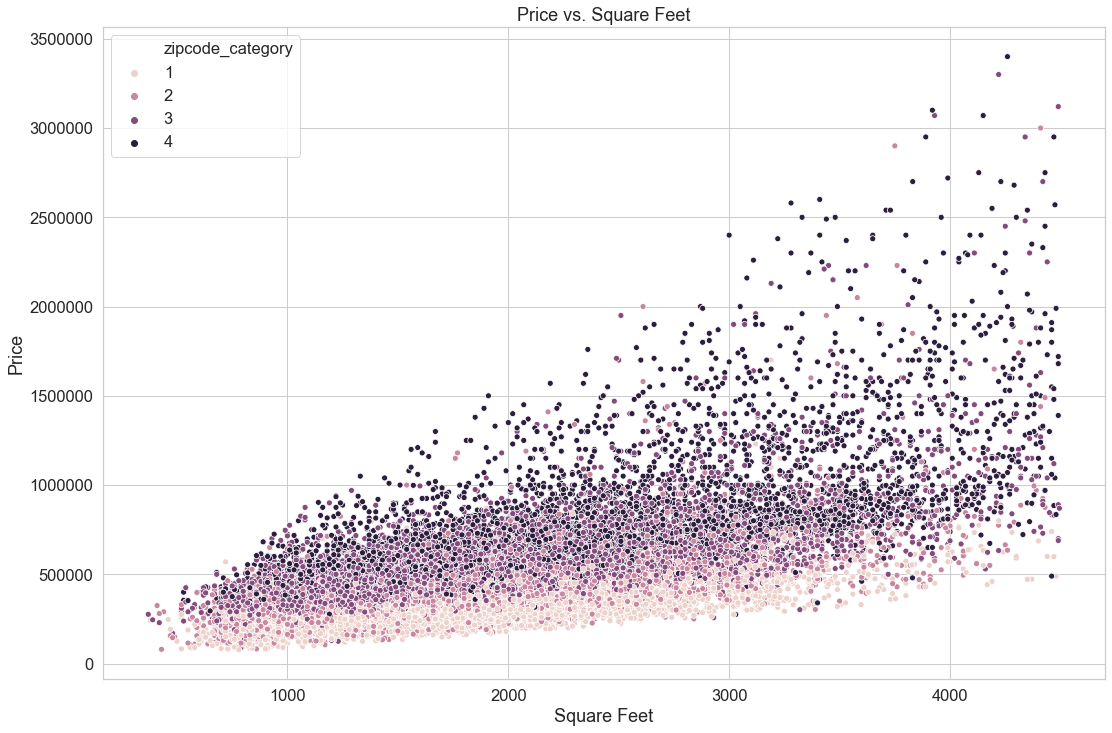

In [33]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="sqft_living", y="price", data=df, hue="zipcode_category")
plt.title("Price vs. Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")

In [34]:
#Dropping unnecessary columns
columns_to_drop2 = ['zipcode', 'lat', 'long', 'index']
df.drop(columns_to_drop2, axis=1, inplace=True)

# Normalization and scaling

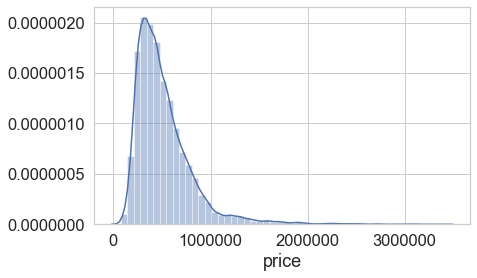

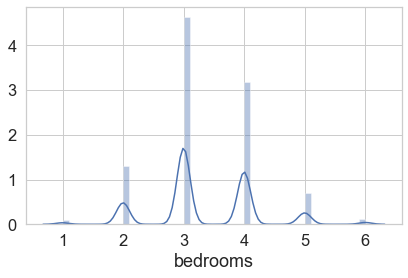

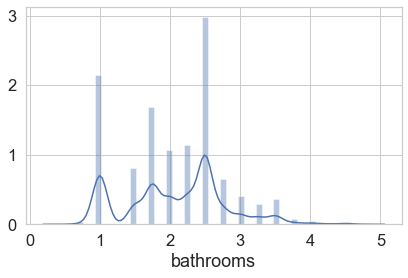

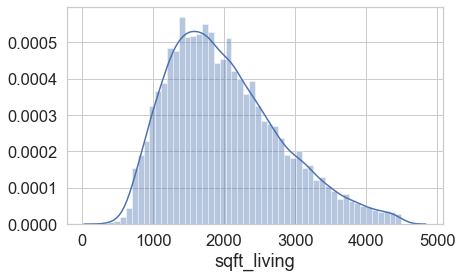

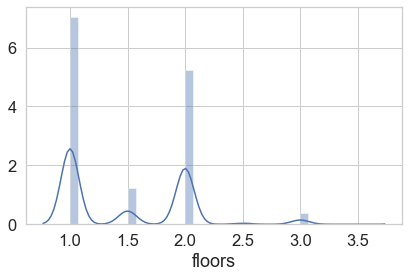

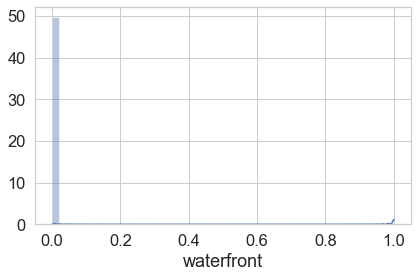

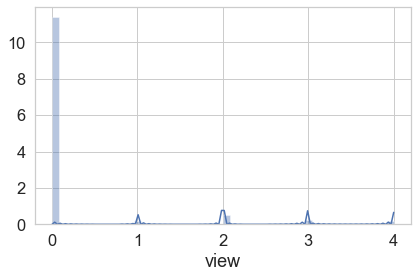

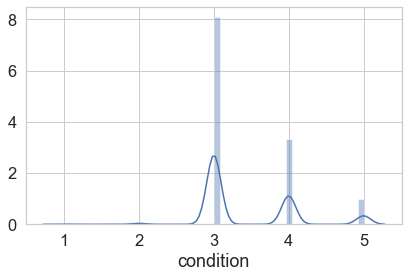

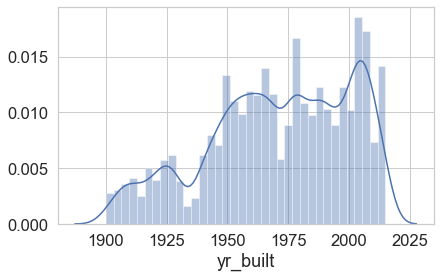

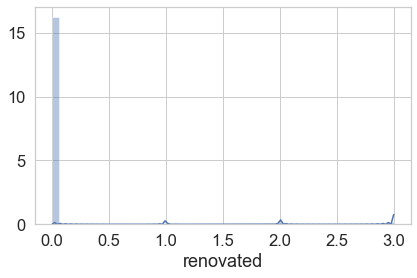

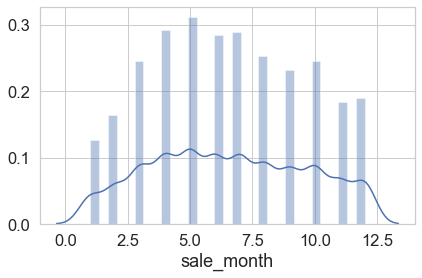

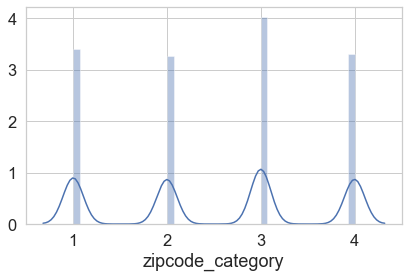

In [35]:
#Creating distplots
for column in df.columns:
    plt.subplots(1,1)
    sns.distplot(df[column])

In [36]:
#We can drop more columns
columns_to_drop3 = ['yr_built', 'sale_month']
df.drop(columns_to_drop3, axis=1, inplace=True)

In [37]:
#Create scaler function and apply with log transformation for continuous variables
def transform(category):
    scaled = (category - np.mean(category)) / np.sqrt(np.var(category))
    return scaled
log_price = np.log(df['price'])
log_sqft_living = np.log(df['sqft_living'])
df['price'] = transform(log_price)
df['sqft_living'] = transform(log_sqft_living)

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,renovated,zipcode_category
0,-1.426628,3,1.00,-1.130317,1.0,0.0,0.0,3,0,1
1,0.344974,3,2.25,0.803630,2.0,0.0,0.0,3,1,2
2,-1.845248,2,1.00,-2.190917,1.0,0.0,0.0,3,0,2
3,0.576449,4,3.00,0.130414,1.0,0.0,0.0,5,0,3
4,0.238058,3,2.00,-0.252580,1.0,0.0,0.0,3,0,4


In [39]:
#Create dummy variables for categoricals, apply to dataframe and drop columns
df['bedrooms'] = df['bedrooms'].astype('category')
bedrooms = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)

df['bathrooms'] = df['bathrooms'].astype('category')
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

df['floors'] = df['floors'].astype('category')
floors = pd.get_dummies(df['floors'], prefix='fl', drop_first=True)

df['waterfront'] = df['waterfront'].astype('category')
waterfront = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)

df['view'] = df['view'].astype('category')
view = pd.get_dummies(df['view'], prefix='vw', drop_first=True)

df['condition'] = df['condition'].astype('category')
condition = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

df['renovated'] = df['renovated'].astype('category')
renovated = pd.get_dummies(df['renovated'], prefix='ren', drop_first=True)

df['zipcode_category'] = df['zipcode_category'].astype('category')
zipcode_cat = pd.get_dummies(df['zipcode_category'], prefix='zip', drop_first=True)

In [40]:
df = pd.concat([df, bedrooms, bathrooms, floors, waterfront, view, condition, renovated, zipcode_cat], axis=1)
df.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'renovated', 'zipcode_category'], axis=1, inplace=True)

In [41]:
df.head(50)

,price,sqft_living,bed_2,bed_3,bed_4,bed_5,bed_6,bath_0.75,bath_1.0,bath_1.25,...,cond_2,cond_3,cond_4,cond_5,ren_1,ren_2,ren_3,zip_2,zip_3,zip_4
0,-1.426628,-1.130317,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.344974,0.803630,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-1.845248,-2.190917,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.576449,0.130414,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.238058,-0.252580,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,-1.128985,-0.201350,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,-0.878497,-1.396773,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,-1.359263,-0.108924,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8,-0.675634,0.040057,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0.761377,1.613229,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
